In [327]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [328]:
train = pd.read_csv('DailyDelhiClimateTrain.csv')
train['date'] = pd.to_datetime(train['date'])
group = train.groupby('date')
df = group.head().drop('date', axis=1)

In [329]:
df

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217
1458,15.238095,87.857143,6.000000,1016.904762
1459,14.095238,89.666667,6.266667,1017.904762
1460,15.052632,87.000000,7.325000,1016.100000


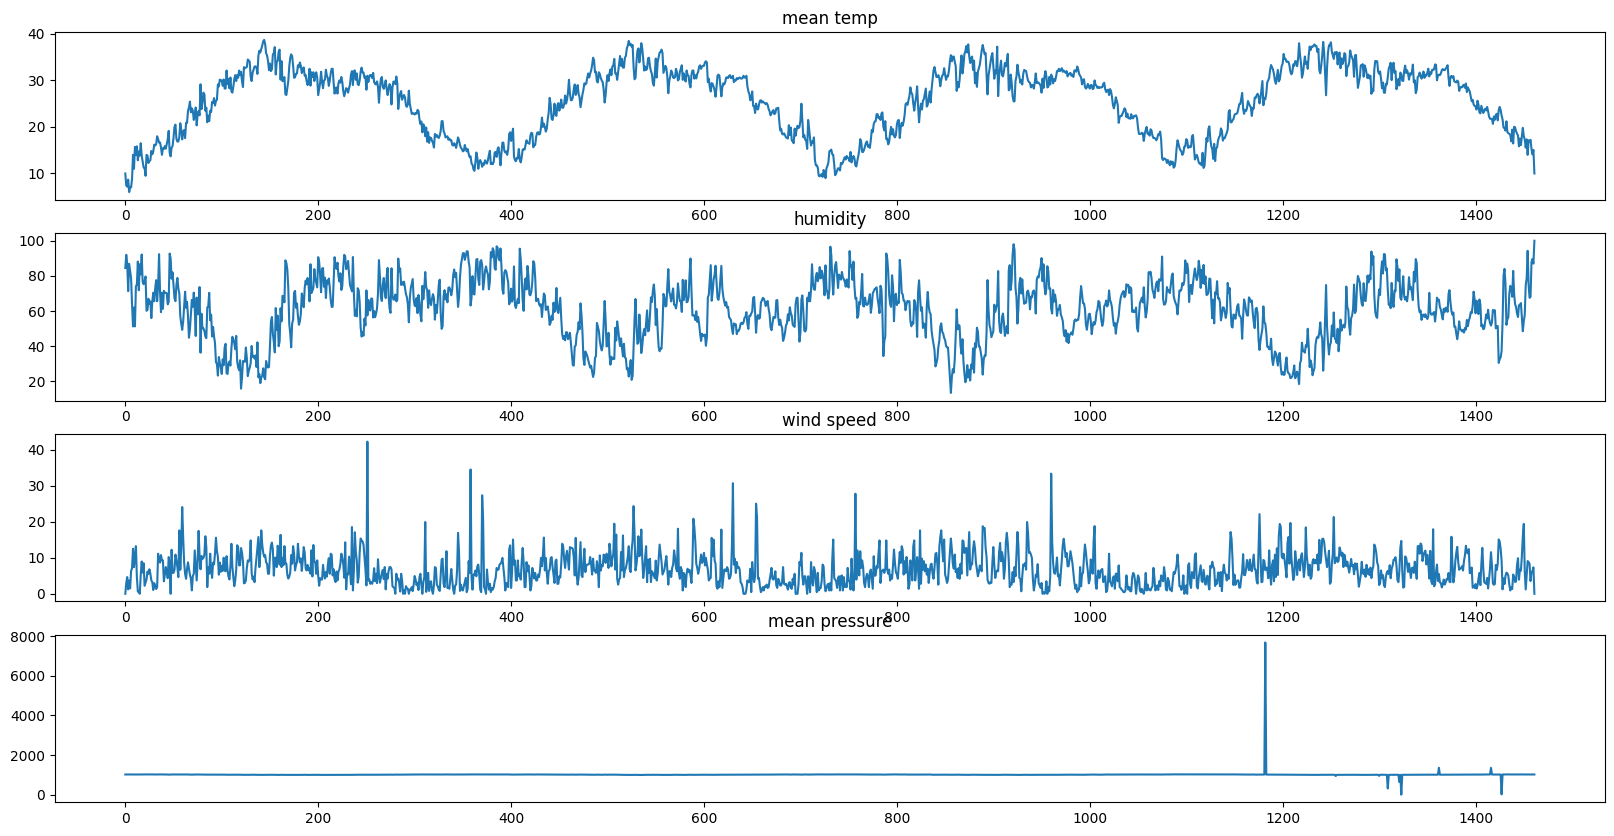

In [330]:
fig, axs = plt.subplots(4, 1,figsize=(20, 10))
axs[0].plot(df['meantemp'])
axs[0].set_title('mean temp')
axs[1].plot(df['humidity'])
axs[1].set_title('humidity')
axs[2].plot(df['wind_speed'])
axs[2].set_title('wind speed')
axs[3].plot(df['meanpressure'])
axs[3].set_title('mean pressure')
plt.show()

In [331]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(df)
scaledDF = pd.DataFrame(training_set, columns = df.columns)
y_train = scaledDF['meanpressure']
x_train = scaledDF.drop('meanpressure', axis=1)
y_train

0       0.132603
1       0.132881
2       0.132994
3       0.132799
4       0.132712
          ...   
1457    0.132590
1458    0.132764
1459    0.132895
1460    0.132660
1461    0.132647
Name: meanpressure, Length: 1462, dtype: float64

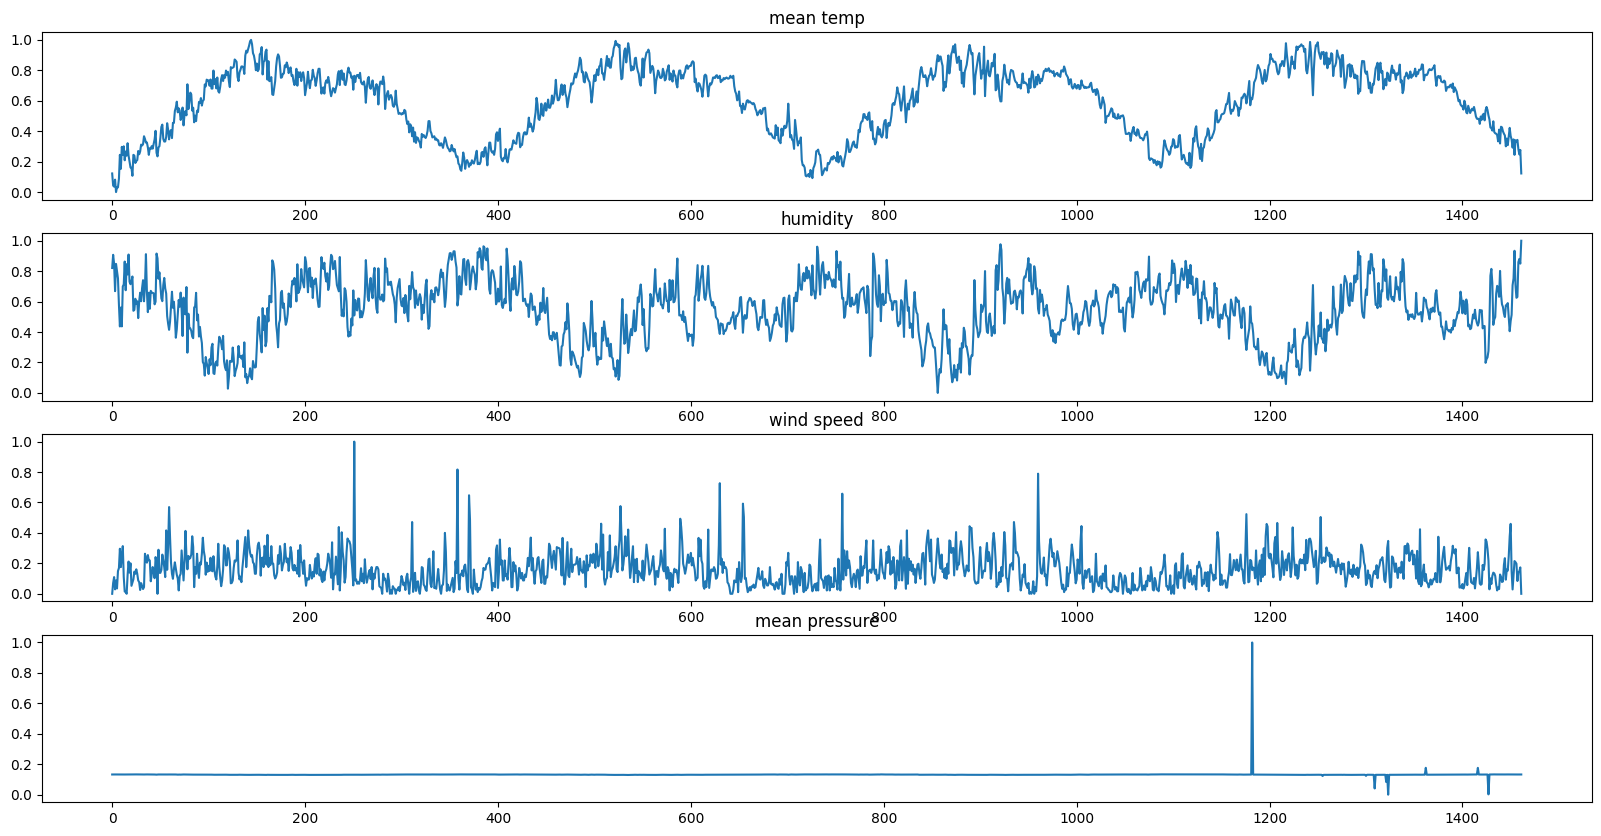

In [332]:
fig, axs = plt.subplots(4, 1,figsize=(20, 10))
axs[0].plot(x_train['meantemp'])
axs[0].set_title('mean temp')
axs[1].plot(x_train['humidity'])
axs[1].set_title('humidity')
axs[2].plot(x_train['wind_speed'])
axs[2].set_title('wind speed')
axs[3].plot(y_train)
axs[3].set_title('mean pressure')
plt.show()

as we can we see we don't need to remove outliers for mean temp and humidity. but, in wind speed and mean pressure we need to do some preproccessing and remove some data.

<hr>

since the data distributions is normal we use z-score to eliminate some outliers.

In [333]:
from scipy.stats import zscore
z_scores = zscore(df['wind_speed'])
new_df = df[np.abs(z_scores) < 3]

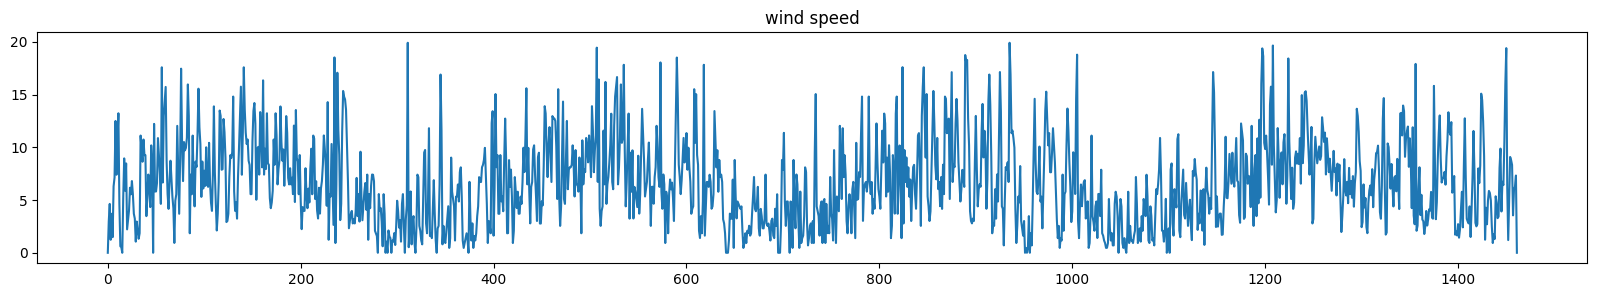

In [334]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(new_df['wind_speed'])
ax.set_title('wind speed')
plt.show()

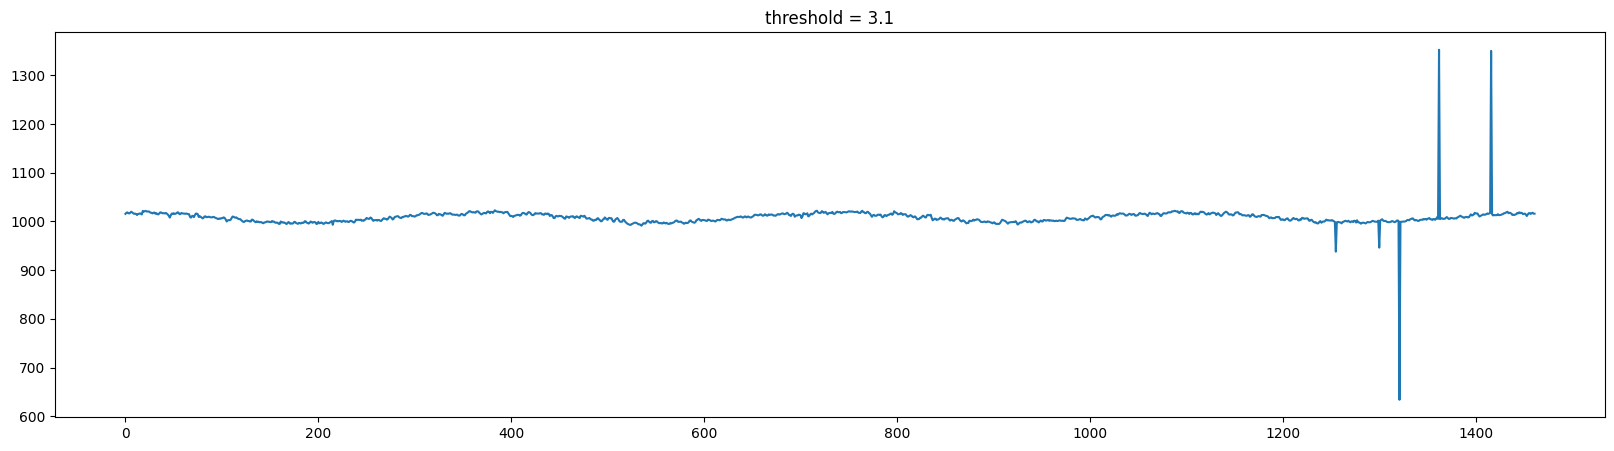

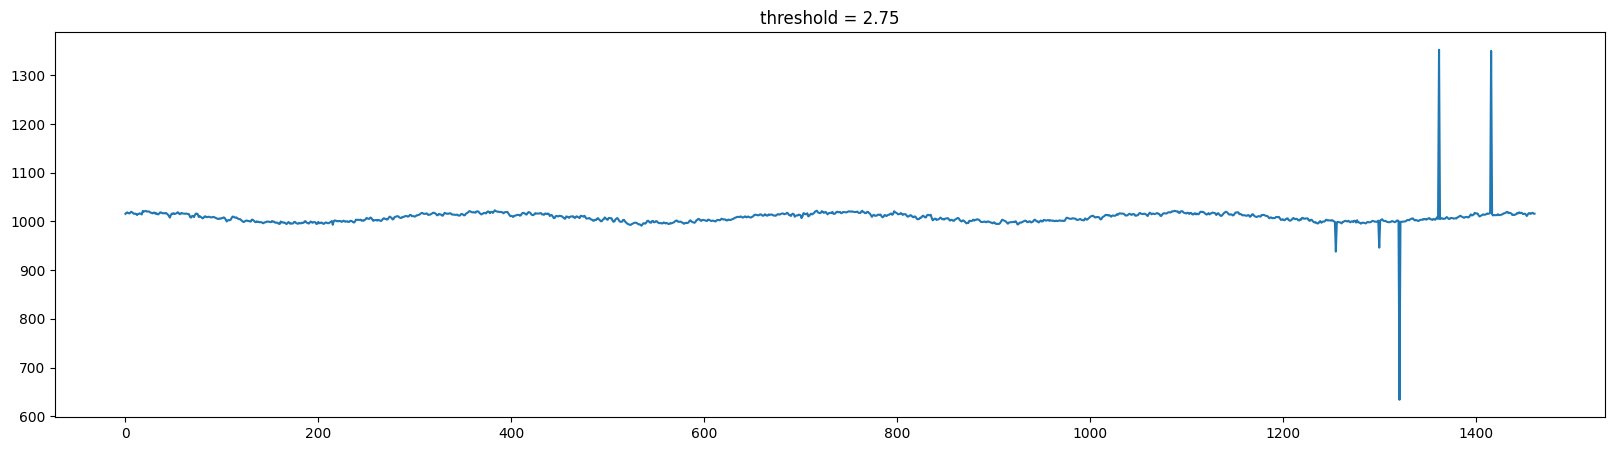

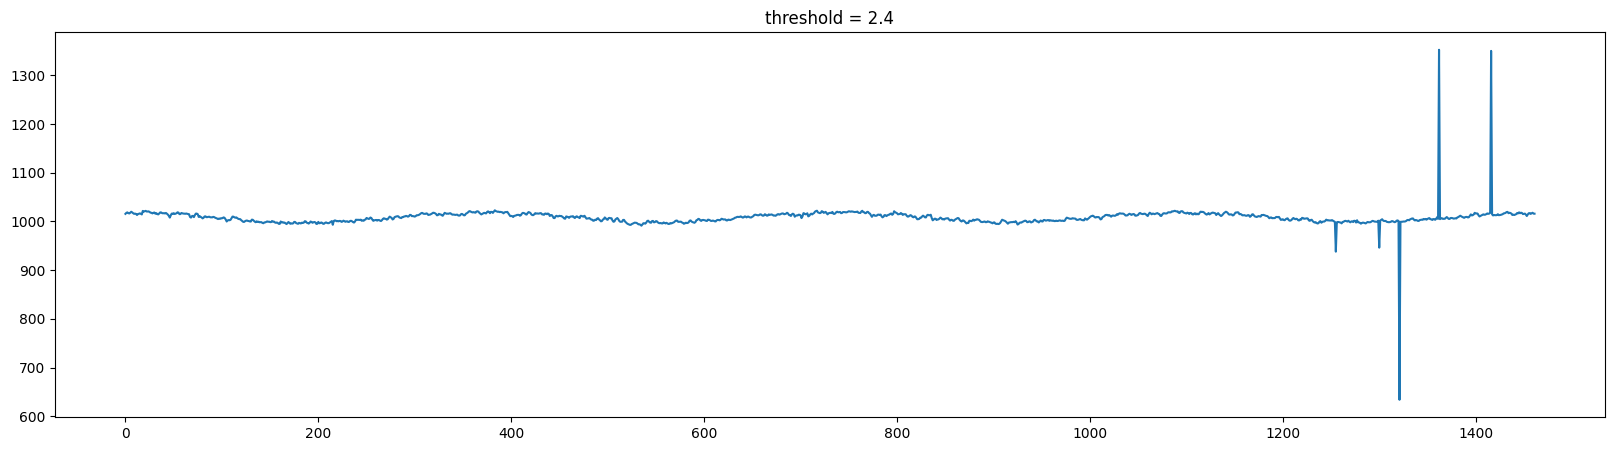

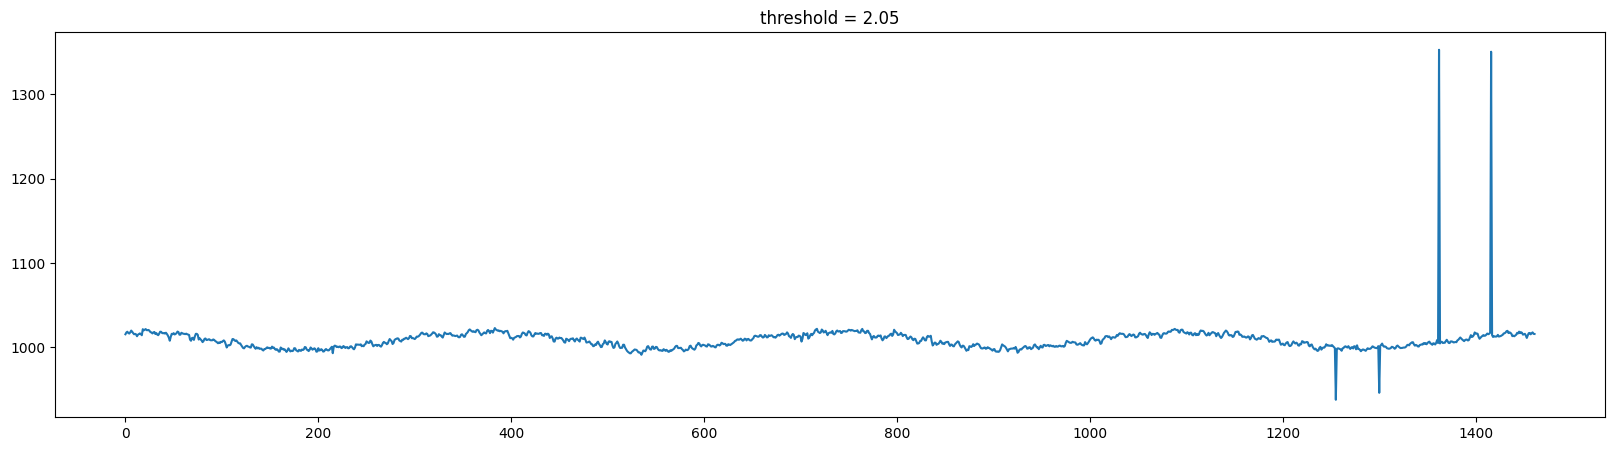

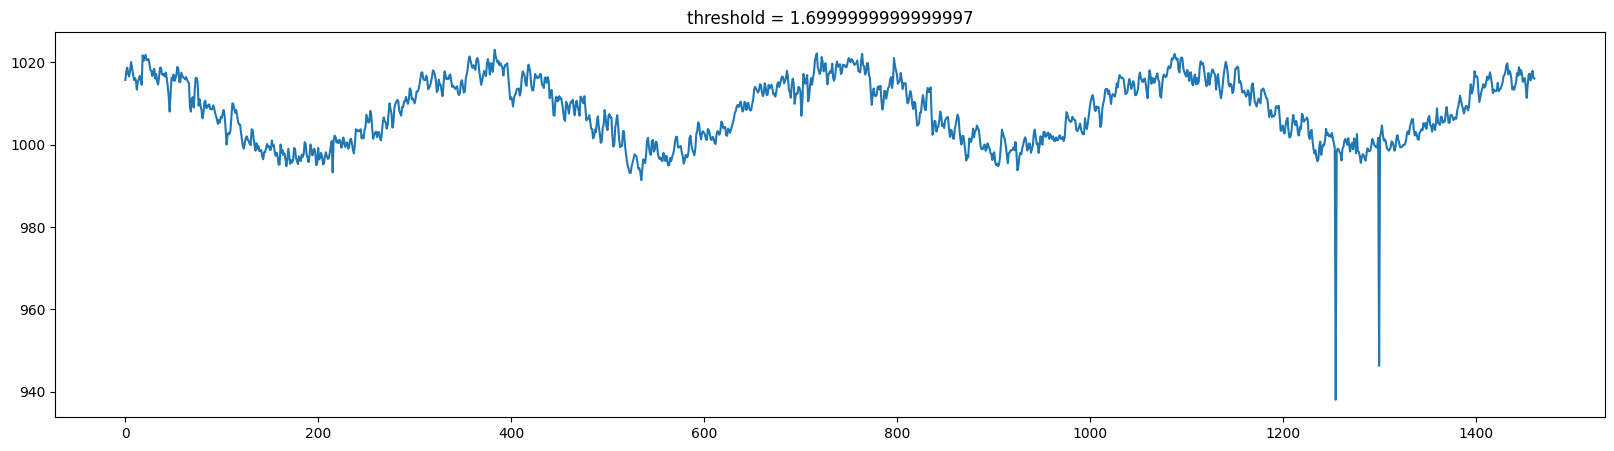

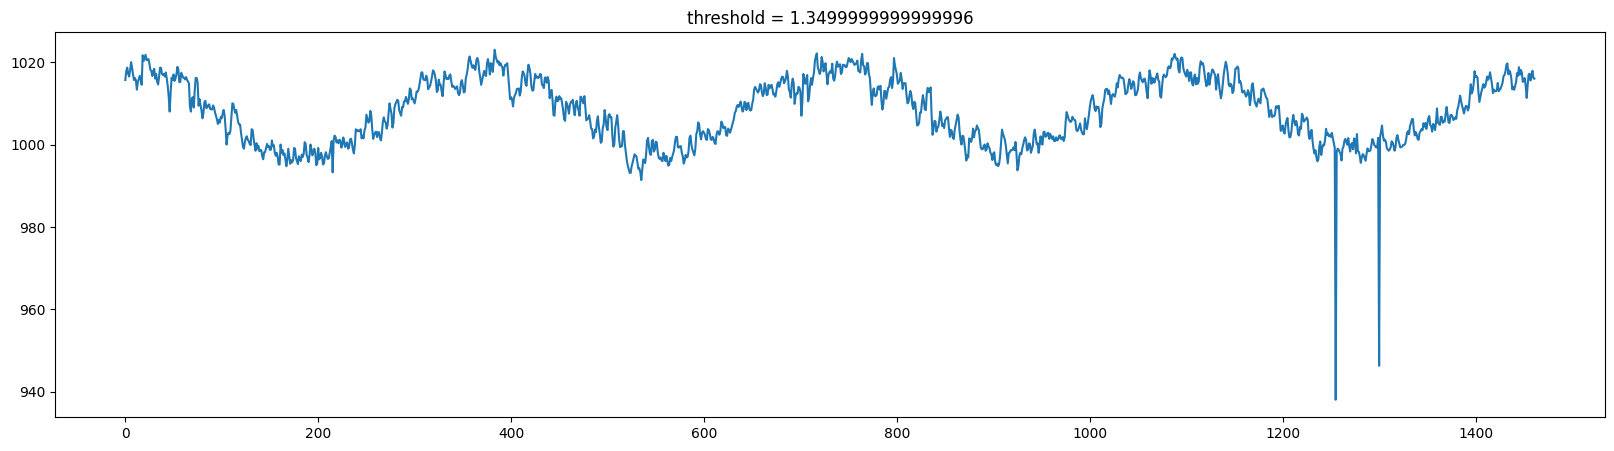

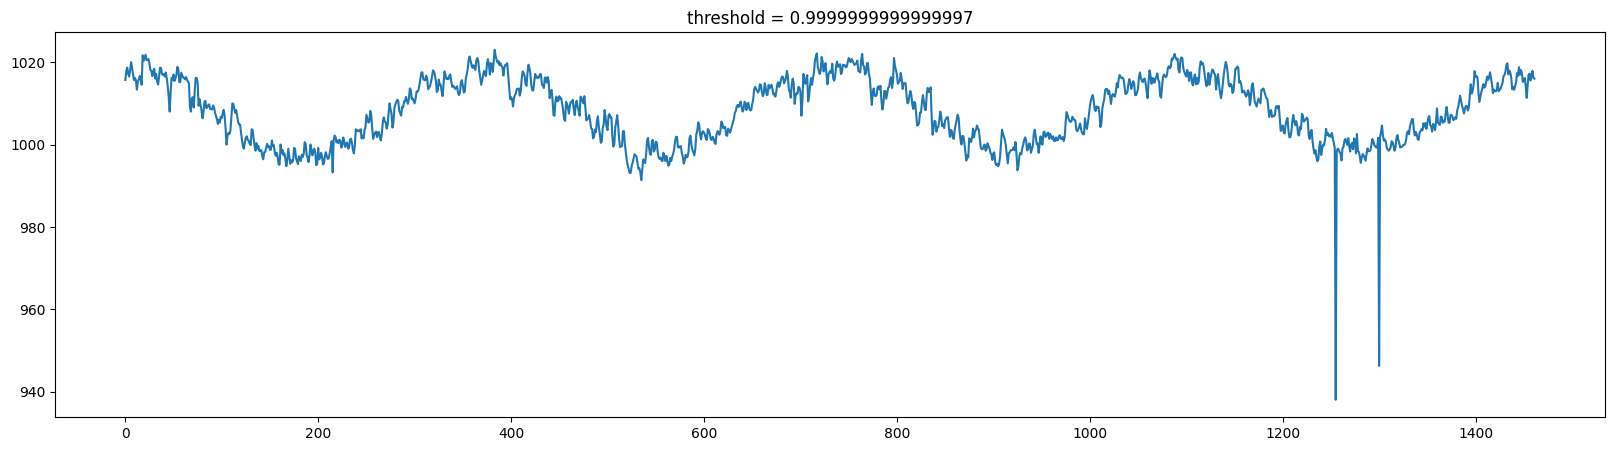

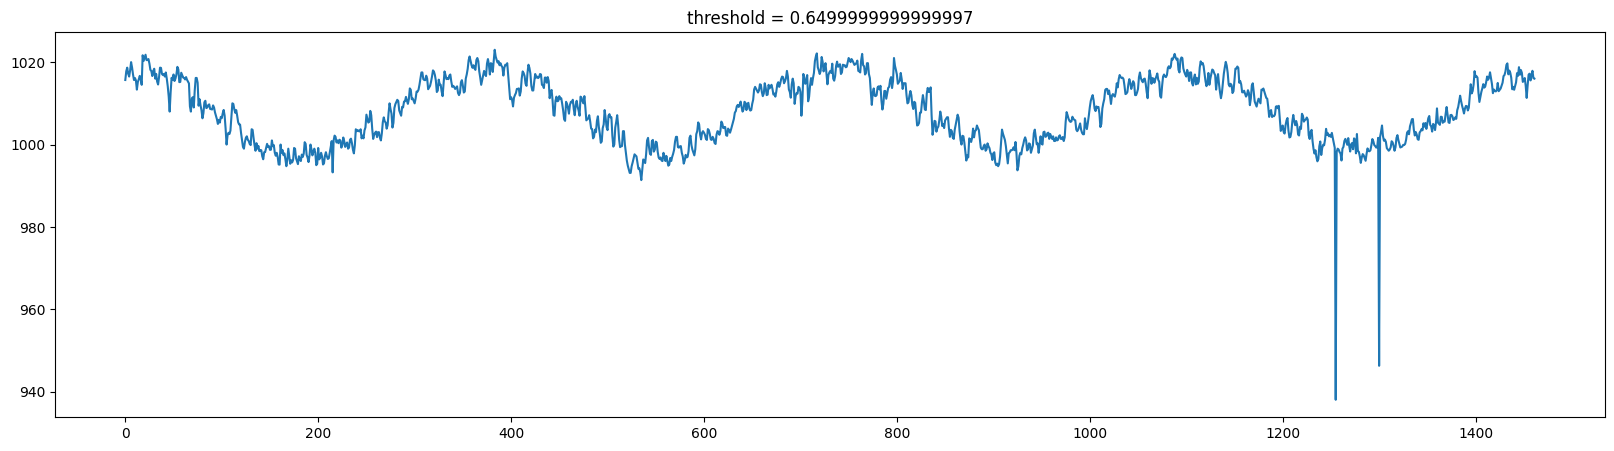

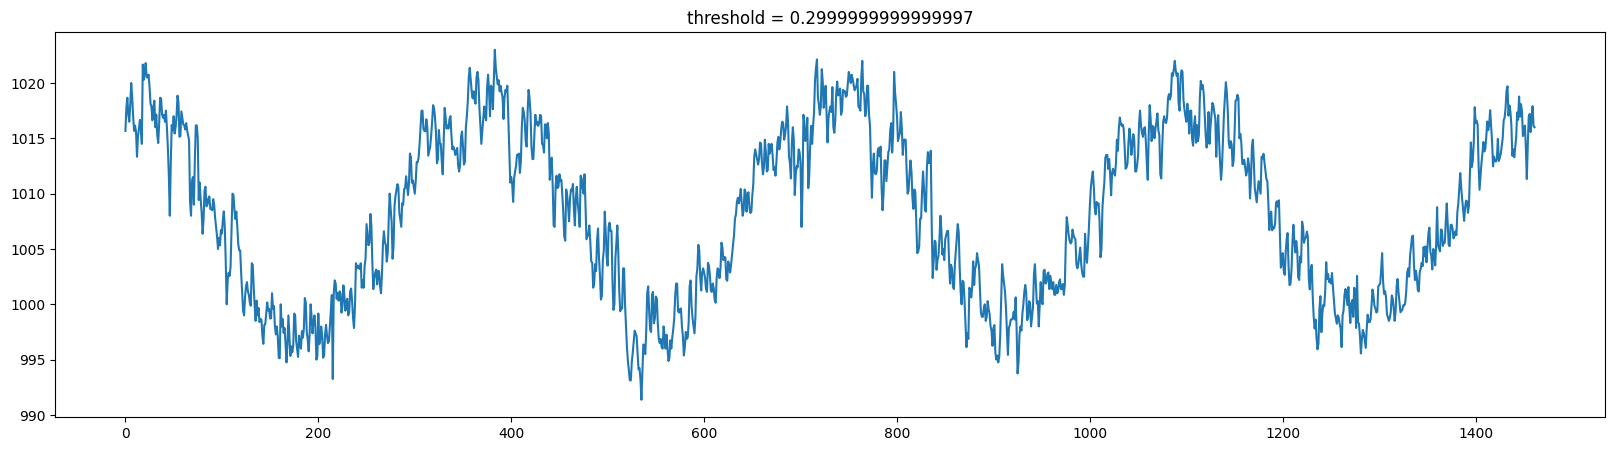

In [335]:
z_scores = zscore(new_df['meanpressure'])
t = 3.1
while t >= 0:
    new_df2 = new_df[np.abs(z_scores) < t]
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(new_df2['meanpressure'])
    ax.set_title(f'threshold = {t}')
    plt.show()
    t -= 0.35

since the variance of the mean pressure is too low we should use a lower threshold to eliminate outliers.

In [337]:
new_df = new_df[np.abs(z_scores) < .3]

In [338]:
sc = MinMaxScaler()
training_set = sc.fit_transform(new_df)
scaledDF = pd.DataFrame(training_set, columns = df.columns)
y_train = scaledDF['meanpressure']
x_train = scaledDF.drop('meanpressure', axis=1)
y_train

0       0.768116
1       0.835573
2       0.862978
3       0.815547
4       0.794466
          ...   
1434    0.764908
1435    0.807265
1436    0.838886
1437    0.781818
1438    0.778656
Name: meanpressure, Length: 1439, dtype: float64

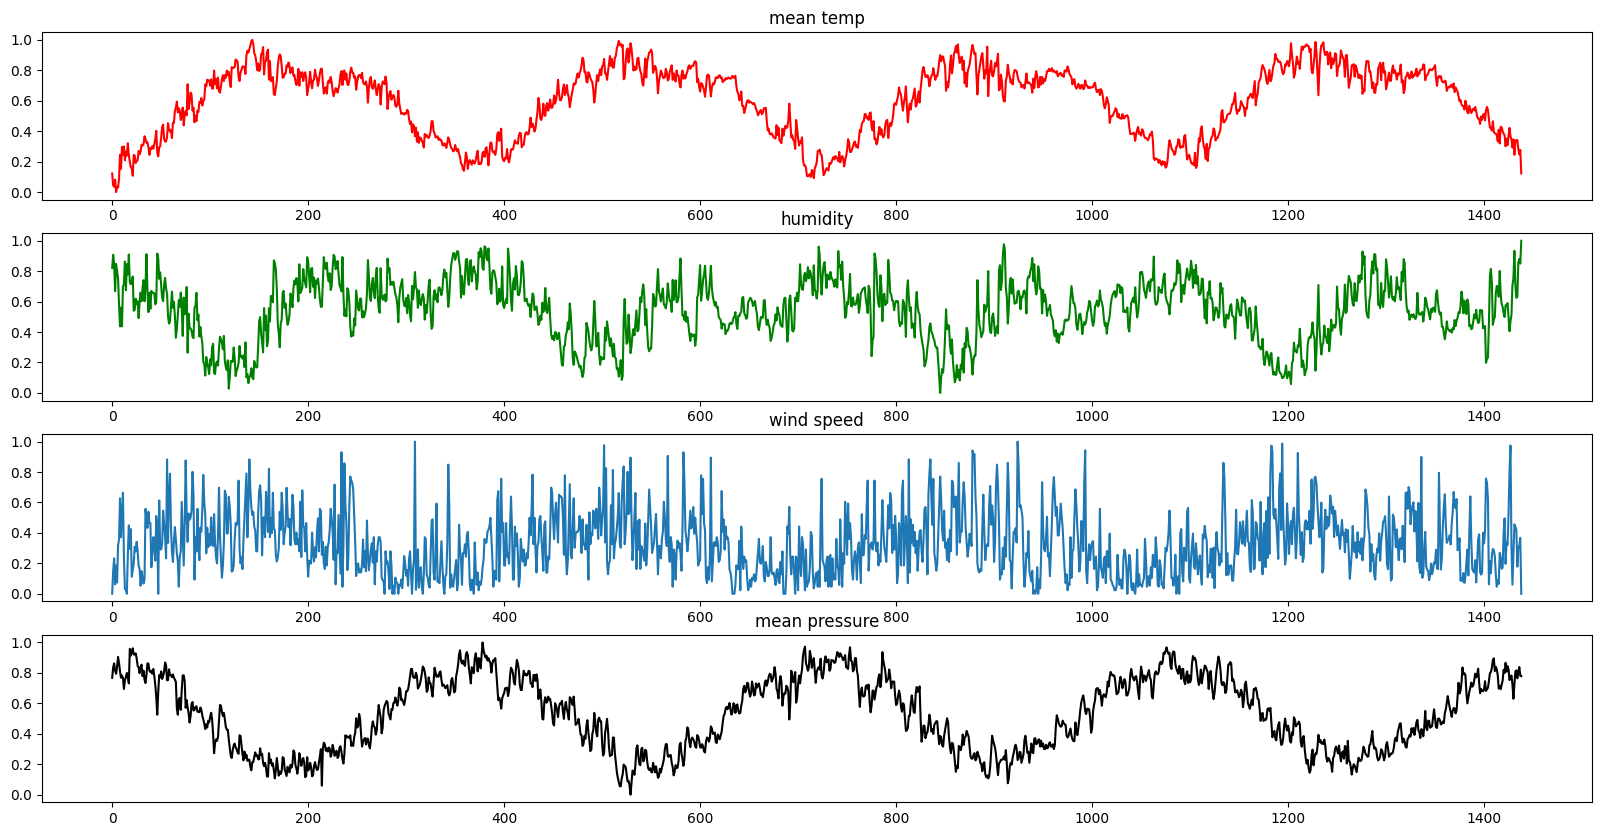

In [339]:
fig, axs = plt.subplots(4, 1,figsize=(20, 10))
axs[0].plot(x_train['meantemp'], color='red')
axs[0].set_title('mean temp')
axs[1].plot(x_train['humidity'], color='green')
axs[1].set_title('humidity')
axs[2].plot(x_train['wind_speed'])
axs[2].set_title('wind speed')
axs[3].plot(y_train, color='black')
axs[3].set_title('mean pressure')
plt.show()

<hr>

In [340]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [341]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100


c:\Users\infor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2631
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0625
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0592
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0549
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0543
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0533
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0507
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0517
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0509
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0487
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0501
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0497
Epoch 13/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0462
Epoch 14/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0471
Epoch 15/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [342]:
test_set = pd.read_csv('DailyDelhiClimateTest.csv')
test_set['date'] = pd.to_datetime(test_set['date'])
group = test_set.groupby('date')
df_test = group.head().drop('date', axis=1)
df_test = df_test.drop(0, axis=0)
df_test = df_test.reset_index(drop=True)
df_test

,meantemp,humidity,wind_speed,meanpressure
0,18.500000,77.222222,2.894444,1018.277778
1,17.111111,81.888889,4.016667,1018.333333
2,18.700000,70.050000,4.545000,1015.700000
3,18.388889,74.944444,3.300000,1014.333333
4,19.318182,79.318182,8.681818,1011.772727
...,...,...,...,...
108,34.500000,27.500000,5.562500,998.625000
109,34.250000,39.375000,6.962500,999.875000
110,32.900000,40.900000,8.890000,1001.600000
111,32.875000,27.500000,9.962500,1002.125000


In [343]:
scaled_test = sc.transform(df_test)
scaledDF_test = pd.DataFrame(scaled_test, columns = df_test.columns)
y_test = scaledDF_test['meanpressure']
x_test = scaledDF_test.drop('meanpressure', axis=1)


In [344]:
predicted = regressor.predict(x_test)
predictedDF = pd.DataFrame(x_test)
predictedDF['meanpressure'] = predicted
predictedDF
reversedTestLabel = pd.DataFrame(sc.inverse_transform(predictedDF), columns=df_test.columns)
reversedTestLabel

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


,meantemp,humidity,wind_speed,meanpressure
0,18.500000,77.222222,2.894444,1013.999515
1,17.111111,81.888889,4.016667,1014.770102
2,18.700000,70.050000,4.545000,1014.233296
3,18.388889,74.944444,3.300000,1014.253171
4,19.318182,79.318182,8.681818,1012.040698
...,...,...,...,...
108,34.500000,27.500000,5.562500,1002.127311
109,34.250000,39.375000,6.962500,1001.671526
110,32.900000,40.900000,8.890000,1002.330717
111,32.875000,27.500000,9.962500,1002.829894


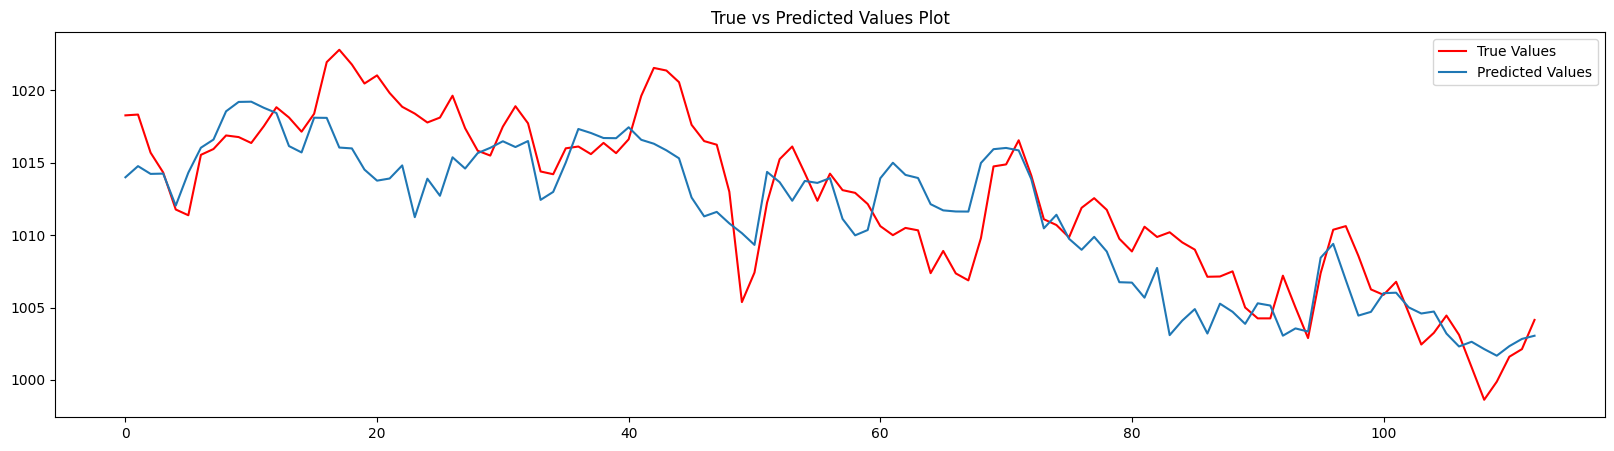

In [346]:
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(df_test['meanpressure'], color='red', label='True Values')
axs.set_title('True vs Predicted Values Plot')
axs.plot(reversedTestLabel['meanpressure'], label='Predicted Values')
plt.legend()
plt.show()


<hr>
now we try a more complex model.

In [347]:
regressor = Sequential()
regressor.add(LSTM(units=4, return_sequences=True, activation='sigmoid', input_shape=(None, 1)))
regressor.add(LSTM(units=4, activation='sigmoid'))
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100


c:\Users\infor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5577
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0624
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0572
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0548
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0557
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0567
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0558
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0566
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0549
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0547
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0541
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0551
Epoch 13/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0529
Epoch 14/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0532
Epoch 15/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

In [348]:
scaled_test = sc.transform(df_test)
scaledDF_test = pd.DataFrame(scaled_test, columns = df_test.columns)
y_test = scaledDF_test['meanpressure']
x_test = scaledDF_test.drop('meanpressure', axis=1)


In [349]:
predicted = regressor.predict(x_test)
predictedDF = pd.DataFrame(x_test)
predictedDF['meanpressure'] = predicted
reversedTestLabel = pd.DataFrame(sc.inverse_transform(predictedDF), columns=df_test.columns)
reversedTestLabel

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


,meantemp,humidity,wind_speed,meanpressure
0,18.500000,77.222222,2.894444,1014.508828
1,17.111111,81.888889,4.016667,1015.225575
2,18.700000,70.050000,4.545000,1014.891795
3,18.388889,74.944444,3.300000,1014.789666
4,19.318182,79.318182,8.681818,1013.319263
...,...,...,...,...
108,34.500000,27.500000,5.562500,1002.891787
109,34.250000,39.375000,6.962500,1001.621899
110,32.900000,40.900000,8.890000,1002.856379
111,32.875000,27.500000,9.962500,1004.312792


In [353]:
mae = mean_absolute_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
mse = mean_squared_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
rmse = np.sqrt(mse)
r2 = r2_score(df_test['meanpressure'], reversedTestLabel['meanpressure'])
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Error: {r2}")

Mean Absolute Error: 2.328506396846301
Mean Squared Error: 8.450345940814072
Root Mean Squared Error: 2.9069478737696817
R2 Error: 0.7385036623019401


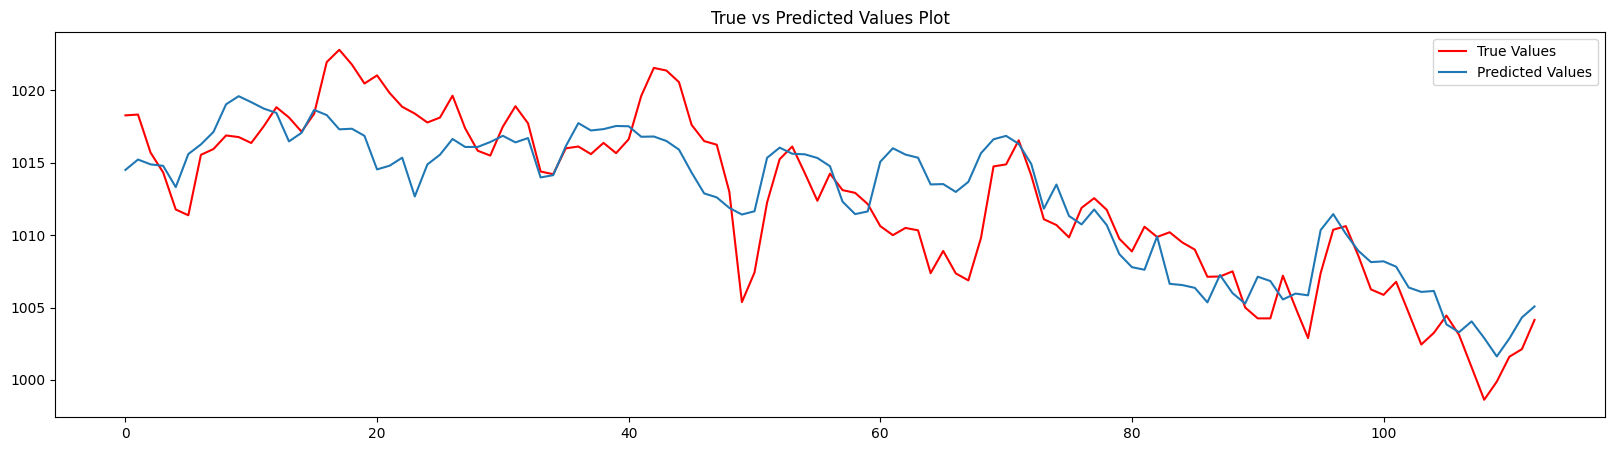

In [350]:
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(df_test['meanpressure'], color='red', label='True Values')
axs.set_title('True vs Predicted Values Plot')
axs.plot(reversedTestLabel['meanpressure'], label='Predicted Values')
plt.legend()
plt.show()

In [354]:
from keras.layers import Dropout
regressor = Sequential()
regressor.add(LSTM(units=4, return_sequences=True, activation='sigmoid', input_shape=(None, 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=4, return_sequences=True, activation='sigmoid'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=4, return_sequences=True, activation='sigmoid'))
regressor.add(LSTM(units=4, activation='sigmoid'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100


c:\Users\infor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7406
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1180
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0918
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0815
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0778
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0683
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0665
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0595
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0595
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0593
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0600
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0569
Epoch 13/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0556
Epoch 14/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0564
Epoch 15/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step -

In [355]:
scaled_test = sc.transform(df_test)
scaledDF_test = pd.DataFrame(scaled_test, columns = df_test.columns)
y_test = scaledDF_test['meanpressure']
x_test = scaledDF_test.drop('meanpressure', axis=1)
predicted = regressor.predict(x_test)
predictedDF = pd.DataFrame(x_test)
predictedDF['meanpressure'] = predicted
reversedTestLabel = pd.DataFrame(sc.inverse_transform(predictedDF), columns=df_test.columns)
reversedTestLabel

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


,meantemp,humidity,wind_speed,meanpressure
0,18.500000,77.222222,2.894444,1011.991237
1,17.111111,81.888889,4.016667,1012.788874
2,18.700000,70.050000,4.545000,1012.165372
3,18.388889,74.944444,3.300000,1012.178574
4,19.318182,79.318182,8.681818,1011.184626
...,...,...,...,...
108,34.500000,27.500000,5.562500,1007.739289
109,34.250000,39.375000,6.962500,1006.399115
110,32.900000,40.900000,8.890000,1006.563664
111,32.875000,27.500000,9.962500,1008.075986


In [357]:
mae = mean_absolute_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
mse = mean_squared_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
rmse = np.sqrt(mse)
r2 = r2_score(df_test['meanpressure'], reversedTestLabel['meanpressure'])
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Error: {r2}")

Mean Absolute Error: 3.394763274608716
Mean Squared Error: 16.408978386517372
Root Mean Squared Error: 4.050799721847202
R2 Error: 0.49222342097067473


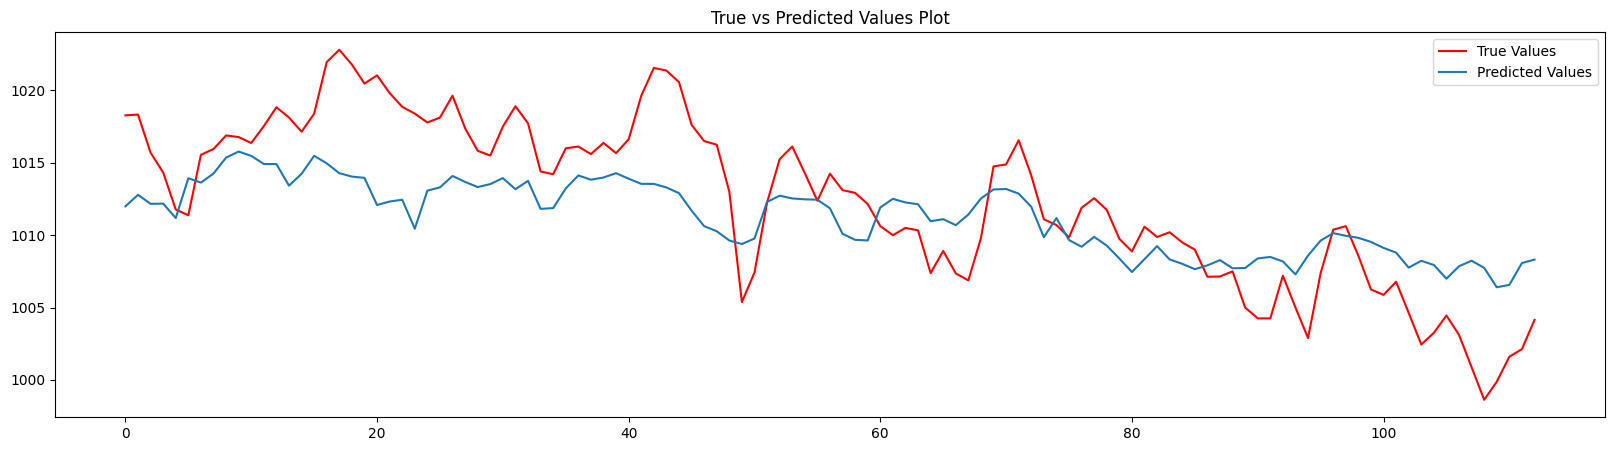

In [356]:
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(df_test['meanpressure'], color='red', label='True Values')
axs.set_title('True vs Predicted Values Plot')
axs.plot(reversedTestLabel['meanpressure'], label='Predicted Values')
plt.legend()
plt.show()

In [358]:
regressor = Sequential()
regressor.add(LSTM(units=4, return_sequences=True, activation='tanh', input_shape=(None, 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=4, return_sequences=True, activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=4, return_sequences=True, activation='tanh'))
regressor.add(LSTM(units=4, activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, batch_size = 20, epochs = 150)

Epoch 1/150


c:\Users\infor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3028
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1324
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0741
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0663
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0661
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0680
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0642
Epoch 8/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0634
Epoch 9/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0602
Epoch 10/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0613
Epoch 11/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0509
Epoch 12/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0291
Epoch 13/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232
Epoch 14/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203
Epoch 15/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200
Epoch 16/150
72/

In [359]:
scaled_test = sc.transform(df_test)
scaledDF_test = pd.DataFrame(scaled_test, columns = df_test.columns)
y_test = scaledDF_test['meanpressure']
x_test = scaledDF_test.drop('meanpressure', axis=1)
predicted = regressor.predict(x_test)
predictedDF = pd.DataFrame(x_test)
predictedDF['meanpressure'] = predicted
reversedTestLabel = pd.DataFrame(sc.inverse_transform(predictedDF), columns=df_test.columns)
reversedTestLabel

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


,meantemp,humidity,wind_speed,meanpressure
0,18.500000,77.222222,2.894444,1015.189069
1,17.111111,81.888889,4.016667,1015.587180
2,18.700000,70.050000,4.545000,1015.281058
3,18.388889,74.944444,3.300000,1015.288138
4,19.318182,79.318182,8.681818,1014.760155
...,...,...,...,...
108,34.500000,27.500000,5.562500,1003.601450
109,34.250000,39.375000,6.962500,1002.047252
110,32.900000,40.900000,8.890000,1003.166363
111,32.875000,27.500000,9.962500,1005.236359


In [361]:
mae = mean_absolute_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
mse = mean_squared_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
rmse = np.sqrt(mse)
r2 = r2_score(df_test['meanpressure'], reversedTestLabel['meanpressure'])
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Error: {r2}")

Mean Absolute Error: 2.550851825388708
Mean Squared Error: 10.568706280973647
Root Mean Squared Error: 3.2509546722422393
R2 Error: 0.672950905674419


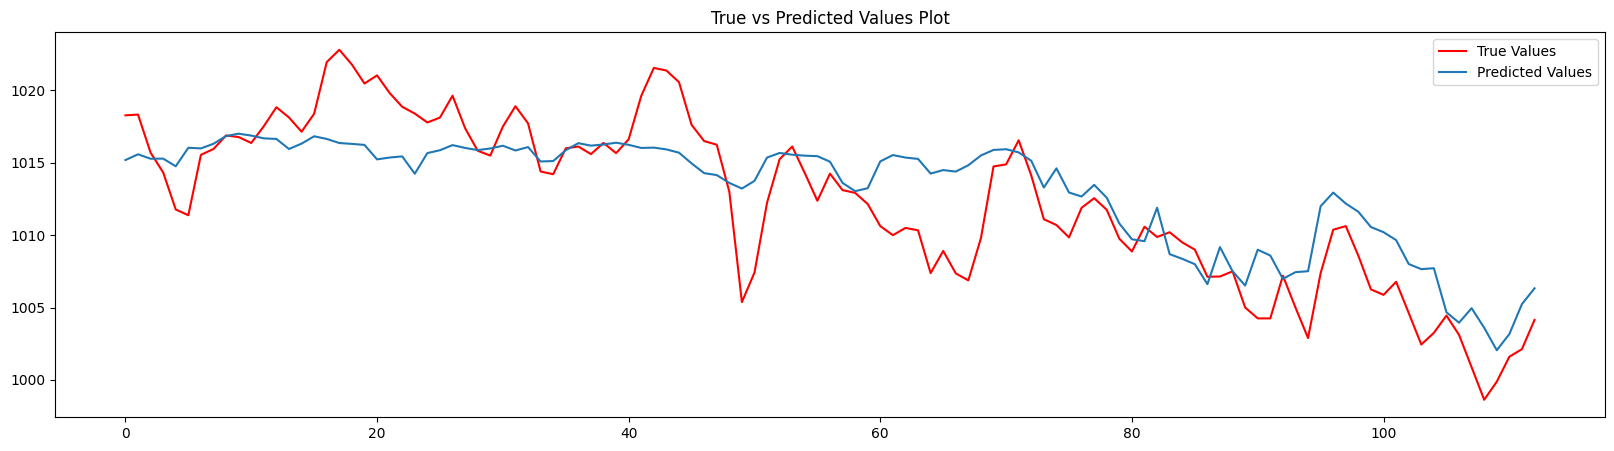

In [360]:
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(df_test['meanpressure'], color='red', label='True Values')
axs.set_title('True vs Predicted Values Plot')
axs.plot(reversedTestLabel['meanpressure'], label='Predicted Values')
plt.legend()
plt.show()

In [362]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, activation='tanh', input_shape=(None, 1)))
regressor.add(LSTM(units=50, return_sequences=True, activation='tanh'))
regressor.add(LSTM(units=50, activation='tanh'))
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, batch_size = 20, epochs = 150)

c:\Users\infor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1923
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0607
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0317
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090
Epoch 8/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084
Epoch 9/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091
Epoch 10/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089
Epoch 11/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089
Epoch 12/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090
Epoch 13/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091
Epoch 14/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085
Epoch 15/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079
Epoc

In [363]:
scaled_test = sc.transform(df_test)
scaledDF_test = pd.DataFrame(scaled_test, columns = df_test.columns)
y_test = scaledDF_test['meanpressure']
x_test = scaledDF_test.drop('meanpressure', axis=1)
predicted = regressor.predict(x_test)
predictedDF = pd.DataFrame(x_test)
predictedDF['meanpressure'] = predicted
reversedTestLabel = pd.DataFrame(sc.inverse_transform(predictedDF), columns=df_test.columns)
reversedTestLabel

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


,meantemp,humidity,wind_speed,meanpressure
0,18.500000,77.222222,2.894444,1014.939912
1,17.111111,81.888889,4.016667,1015.534023
2,18.700000,70.050000,4.545000,1015.031813
3,18.388889,74.944444,3.300000,1015.067973
4,19.318182,79.318182,8.681818,1014.153789
...,...,...,...,...
108,34.500000,27.500000,5.562500,1001.876921
109,34.250000,39.375000,6.962500,1001.936133
110,32.900000,40.900000,8.890000,1003.208537
111,32.875000,27.500000,9.962500,1003.124548


In [364]:
mae = mean_absolute_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
mse = mean_squared_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
rmse = np.sqrt(mse)
r2 = r2_score(df_test['meanpressure'], reversedTestLabel['meanpressure'])
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Error: {r2}")

Mean Absolute Error: 2.1910668153422246
Mean Squared Error: 7.838228594406248
Root Mean Squared Error: 2.79968365970269
R2 Error: 0.7574456612979812


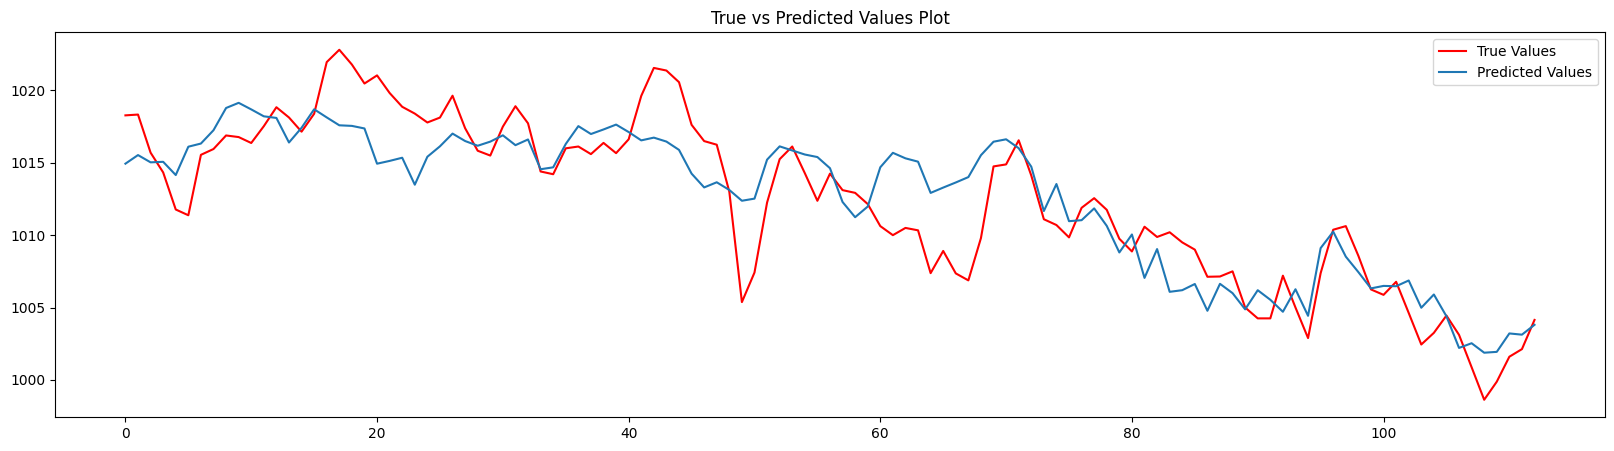

In [365]:
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(df_test['meanpressure'], color='red', label='True Values')
axs.set_title('True vs Predicted Values Plot')
axs.plot(reversedTestLabel['meanpressure'], label='Predicted Values')
plt.legend()
plt.show()

In [366]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, activation='tanh', input_shape=(None, 1)))
regressor.add(LSTM(units=50, activation='tanh'))
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, batch_size = 30, epochs = 200)

Epoch 1/200


c:\Users\infor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2203
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0703
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0637
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0510
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112
Epoch 7/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112
Epoch 8/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103
Epoch 9/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106
Epoch 10/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101
Epoch 11/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088
Epoch 12/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099
Epoch 13/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 14/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 15/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089
Epoch 16/200
48

In [367]:
scaled_test = sc.transform(df_test)
scaledDF_test = pd.DataFrame(scaled_test, columns = df_test.columns)
y_test = scaledDF_test['meanpressure']
x_test = scaledDF_test.drop('meanpressure', axis=1)
predicted = regressor.predict(x_test)
predictedDF = pd.DataFrame(x_test)
predictedDF['meanpressure'] = predicted
reversedTestLabel = pd.DataFrame(sc.inverse_transform(predictedDF), columns=df_test.columns)
reversedTestLabel

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


,meantemp,humidity,wind_speed,meanpressure
0,18.500000,77.222222,2.894444,1015.962328
1,17.111111,81.888889,4.016667,1016.378960
2,18.700000,70.050000,4.545000,1016.136819
3,18.388889,74.944444,3.300000,1016.148198
4,19.318182,79.318182,8.681818,1014.762077
...,...,...,...,...
108,34.500000,27.500000,5.562500,1002.818011
109,34.250000,39.375000,6.962500,1002.685823
110,32.900000,40.900000,8.890000,1003.869908
111,32.875000,27.500000,9.962500,1003.840246


In [368]:
mae = mean_absolute_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
mse = mean_squared_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
rmse = np.sqrt(mse)
r2 = r2_score(df_test['meanpressure'], reversedTestLabel['meanpressure'])
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Error: {r2}")

Mean Absolute Error: 2.1938518026032967
Mean Squared Error: 7.782143921091475
Root Mean Squared Error: 2.7896494261988325
R2 Error: 0.7591812040527424


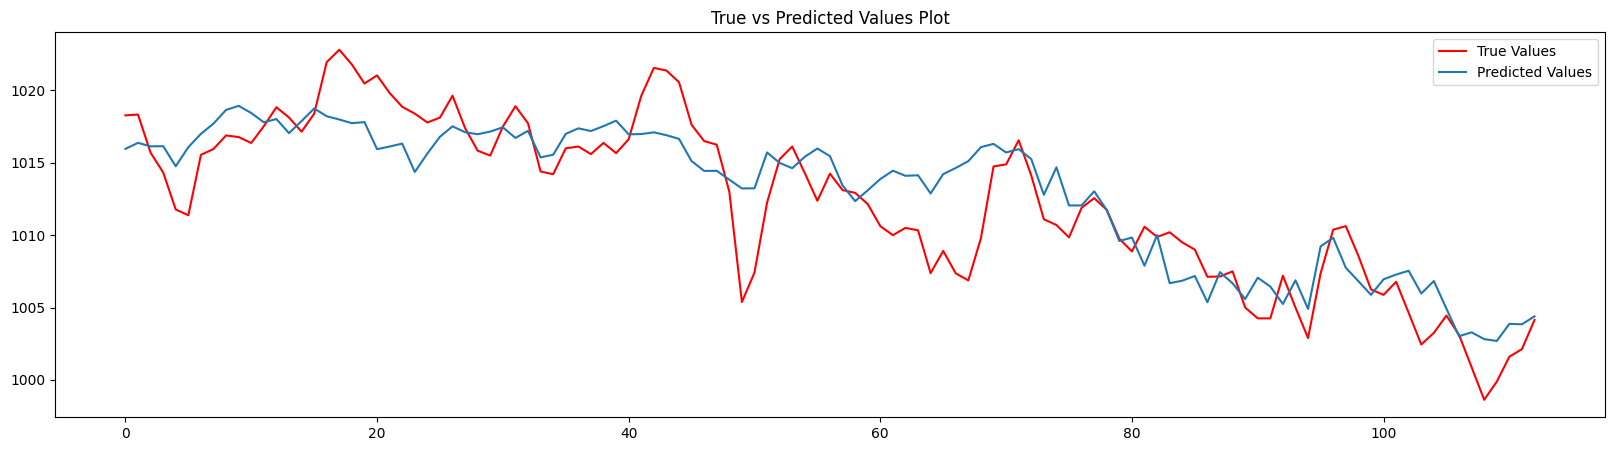

In [369]:
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(df_test['meanpressure'], color='red', label='True Values')
axs.set_title('True vs Predicted Values Plot')
axs.plot(reversedTestLabel['meanpressure'], label='Predicted Values')
plt.legend()
plt.show()

<hr>

In [398]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(GRU(units=50, input_shape=(None, 1), return_sequences=True))
model.add(GRU(units=50, input_shape=(None, 1), return_sequences=True))
model.add(GRU(units=50, input_shape=(None, 1), return_sequences=False))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2)


Epoch 1/150


c:\Users\infor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1533 - val_loss: 0.0582
Epoch 2/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0733 - val_loss: 0.0498
Epoch 3/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0641 - val_loss: 0.0413
Epoch 4/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0452 - val_loss: 0.0141
Epoch 5/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_loss: 0.0064
Epoch 6/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - val_loss: 0.0081
Epoch 7/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - val_loss: 0.0096
Epoch 8/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - val_loss: 0.0102
Epoch 9/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 10/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 11/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - val_loss: 0.0109
Epoch 12/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - val_l

In [399]:
scaled_test = sc.transform(df_test)
scaledDF_test = pd.DataFrame(scaled_test, columns = df_test.columns)
y_test = scaledDF_test['meanpressure']
x_test = scaledDF_test.drop('meanpressure', axis=1)
predicted = model.predict(x_test)
predictedDF = pd.DataFrame(x_test)
predictedDF['meanpressure'] = predicted
reversedTestLabel = pd.DataFrame(sc.inverse_transform(predictedDF), columns=df_test.columns)
reversedTestLabel

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


,meantemp,humidity,wind_speed,meanpressure
0,18.500000,77.222222,2.894444,1015.751241
1,17.111111,81.888889,4.016667,1016.064214
2,18.700000,70.050000,4.545000,1015.698689
3,18.388889,74.944444,3.300000,1015.864448
4,19.318182,79.318182,8.681818,1014.100530
...,...,...,...,...
108,34.500000,27.500000,5.562500,1000.881886
109,34.250000,39.375000,6.962500,1001.212968
110,32.900000,40.900000,8.890000,1002.698657
111,32.875000,27.500000,9.962500,1002.526490


In [403]:
mae = mean_absolute_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
mse = mean_squared_error(df_test['meanpressure'], reversedTestLabel['meanpressure'])
rmse = np.sqrt(mse)
r2 = r2_score(df_test['meanpressure'], reversedTestLabel['meanpressure'])
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Error: {r2}")

Mean Absolute Error: 2.0453102345561267
Mean Squared Error: 6.89169972682083
Root Mean Squared Error: 2.6252047018891367
R2 Error: 0.7867360399561636


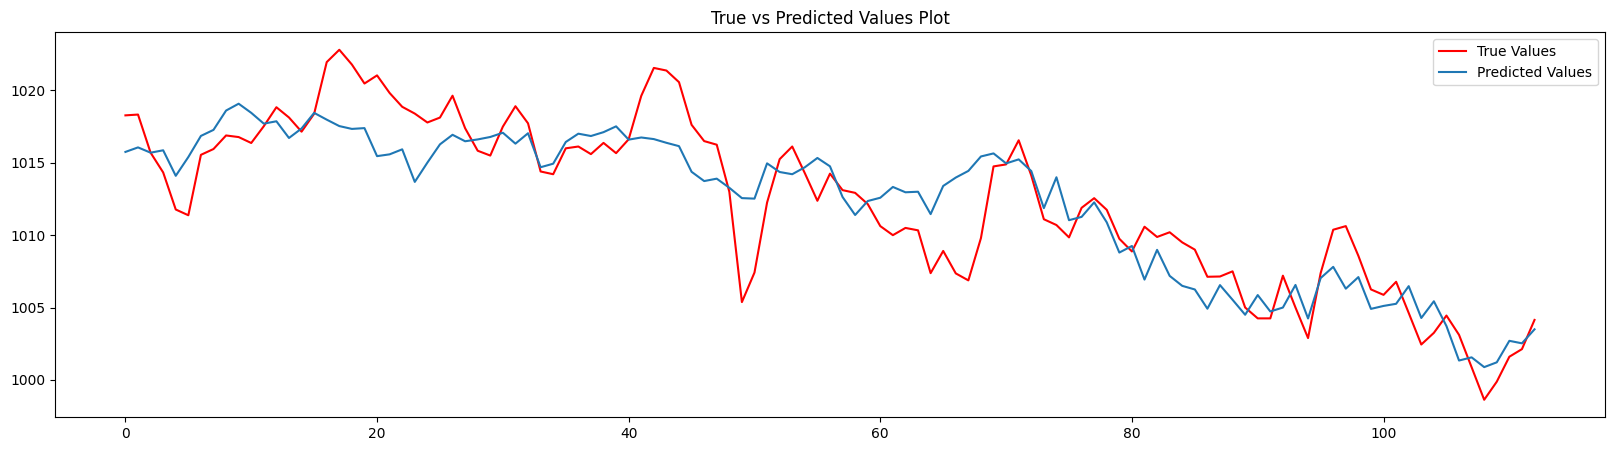

In [402]:
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(df_test['meanpressure'], color='red', label='True Values')
axs.set_title('True vs Predicted Values Plot')
axs.plot(reversedTestLabel['meanpressure'], label='Predicted Values')
plt.legend()
plt.show()